In [ ]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

In [ ]:
# SL_spectrum
SL_dia = pd.read_csv('./spectrum/SemiLab/SL_dia.csv')['R'].values
SL_bri = pd.read_csv('./spectrum/SemiLab/SL_bri.csv')['R'].values
SL_tra = pd.read_csv('./spectrum/SemiLab/SL_tra.csv')['R'].values
# open material
air = ml.Non_Dispersion(1)
sodalime = ml.open_material('sodalime', 'Material')
SiO2 = ml.open_material('SiO2_LENS', 'Sellmeier')
SiN = ml.open_material('SiN_LENS', 'Sellmeier')
ITO = ml.open_material('ITO_LENS', 'Sellmeier')
OC = ml.open_material('OC_LENS', 'Material')

# fitting model
wl = np.linspace(400, 700, 301)
OC.k = 0*np.ones(np.size(OC.wl))
hypo_dia = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl)
hypo_tra = lambda th: tm.Design(
    [air, OC, SiN, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl)
hypo_bri = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], th[6], th[7], None]
).reflectance(wl)

In [ ]:
FOM_dia = lambda th: np.mean((hypo_dia(th)-SL_dia)**2)
sol_dia = differential_evolution(
    FOM_dia, [(1600, 2200),(8, 12),(0, 60),(20, 30),(40, 60),(8,12)]
)
print(sol_dia.x)

plt.plot(wl, hypo_dia(sol_dia.x))
plt.plot(wl, SL_dia)
plt.show()

In [ ]:
FOM_tra = lambda th: np.mean((hypo_tra(th)-SL_tra)**2)
sol_tra = differential_evolution(
    FOM_tra, [(1600, 2200),(8, 12),(0, 150),(8,12)]
)
print(sol_tra.x)

plt.plot(wl, hypo_tra(sol_tra.x))
plt.plot(wl, SL_tra)
plt.show()

In [ ]:
FOM_bri = lambda th: np.mean((hypo_bri(th)-SL_bri)**2)
sol_bri = differential_evolution(
    FOM_bri, [(0, 2200),(8, 12),(30, 60),(20, 30),(1000, 1500),(20, 30),(40, 60),(8,12)]
)
print(sol_bri.x)

plt.plot(wl, hypo_bri(sol_bri.x))
plt.plot(wl, SL_bri)
plt.show()

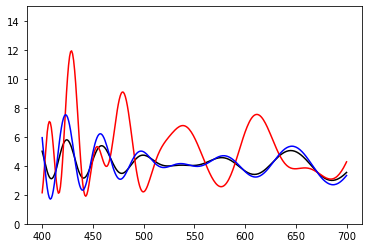

In [3]:
plt.plot(wl, 100*SL_dia, '-k', label = 'diamond')
plt.plot(wl, 100*SL_bri, '-r', label = 'bridge')
plt.plot(wl, 100*SL_tra, '-b', label = 'trace')
#plt.legend(loc = 'best')
plt.ylim(0,15)
#plt.savefig('all.png')
plt.show()

In [6]:
print(np.mean(abs(SL_dia-SL_tra)))
print(np.mean(abs(SL_dia-SL_bri)))
print(np.mean(SL_dia))
print(np.mean(SL_tra))
print(np.mean(SL_bri))

0.0029664826885286884
0.01726086312211588
0.04145337266136751
0.04182999053392395
0.04996992018663009
